# Analysis of the result of Michael simulations

In this notebook, we analyze the results of Michael's simulations of the Gene regulatory model. We first import some basic libraries.

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import os as os
import cPickle as pickle
import numpy as np

We read the content of the folder with the pickle files 

In [29]:
path = './tmp/DATA/'
files = os.listdir(path)

Let's pick a random example, to get familiar with the problem. We first read the parameters from the file name

In [264]:
pick = 14
variance = float(files[pick].split('_')[5][5:])
generations = int(files[pick].split('_')[3][7:])
population = (files[pick].split('_')[2][7:])

 We now load our pick, choosing a generation and an individual.

In [265]:
ex_sim = pickle.load( open(path + files[pick],'rb') )[2]
g = generations-1 # a number <generations
ind = 1 # a number < population
Jij = ex_sim[g][ind][0]

We can now calculate the eigenspectrum

In [266]:
w, v = np.linalg.eig(Jij)

We plot it directly, keeping an arbitrary index in the horizontal axis

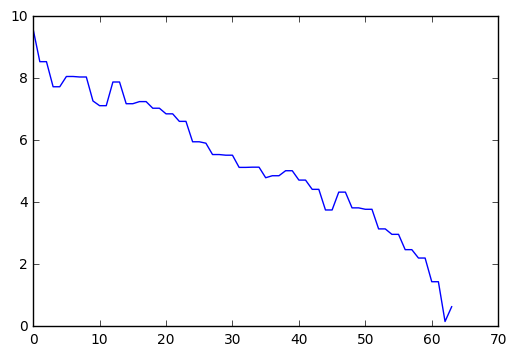

In [267]:
plt.plot(np.abs(w))
plt.show()

We can also plot a histogram, although we will not see much because there is not enough information in an individual

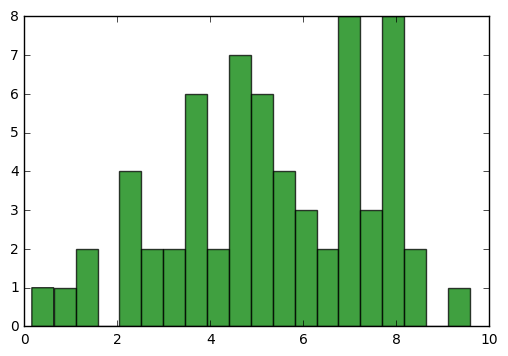

In [268]:
plt.hist(np.abs(w), 20, facecolor='green', alpha=0.75)
plt.show()

More generally, we can look at the statistics of many individuals taken together.

In [281]:
Jij_many = ex_sim[10]
w_list = []

for k in Jij_many:
    Jij = k[0]
    w, v = np.linalg.eig(Jij)
    w_list.append(w)

We simply mix all the results together and plot a histogram

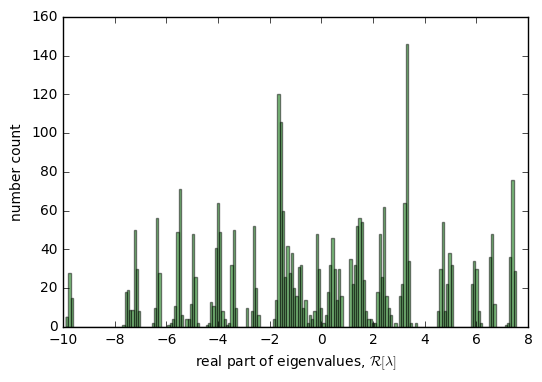

In [287]:
w_together = np.concatenate(w_list).ravel()
plt.hist(np.real(w_together), 200, facecolor='green', alpha=0.5)
plt.xlabel('real part of eigenvalues, $\mathcal{R}[\lambda]$',fontdict={'fontsize':10})
plt.ylabel('number count',fontdict={'fontsize':10})
plt.show()